In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Change default colours to personal colour scheme
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["indianred", "cornflowerblue", "mediumseagreen", "plum", "sandybrown"]) 

In [4]:
rootPath = r"/home/daraghhollman/main/UCD_PASS_Labs/Electronics/Excercises"

In [10]:
def LoadFile(path):
    data = np.array(np.loadtxt(path, skiprows=2))
    return data

# Exercise 5

In [65]:
def RC_Voltage(t, V_i, R, C):

    if type(t) == list:
        VOutput = []

        for time in t:
            V = V_i * np.exp(-time/(R*C))
            VOutput.append(V)
    else:
        VOutput = V_i * np.exp(-t/(R*C))

    return VOutput

In [7]:
ex5 = LoadFile(rootPath + r"/ex5/ex5.txt")

In [72]:
def ex5Plot(data):

    xValues = [el - min(data[:,0]) for el in data[:,0]]
    channel01 = data[:,1]
    channel02 = data[:,2]

    fig, axes = plt.subplots(2,1, figsize=(6, 8))

    axes[0].plot(xValues, channel01, label="Channel 1")
    axes[0].plot(xValues, channel02, label="Channel 2")

    axes[1].set_xlim((0, 0.025))
    axes[1].plot(xValues, channel01, label="Channel 1")
    axes[1].plot(xValues, channel02, label="Channel 2")
    axes[1].plot(xValues, RC_Voltage(xValues, 5, 1e3, 1e-6), label="Analytical Solution")

    for i in range(len(axes)):
        axes[i].set_xlabel("Time (s)")
        axes[i].set_ylabel("Voltage (V)")
        axes[i].grid()
        axes[i].legend()

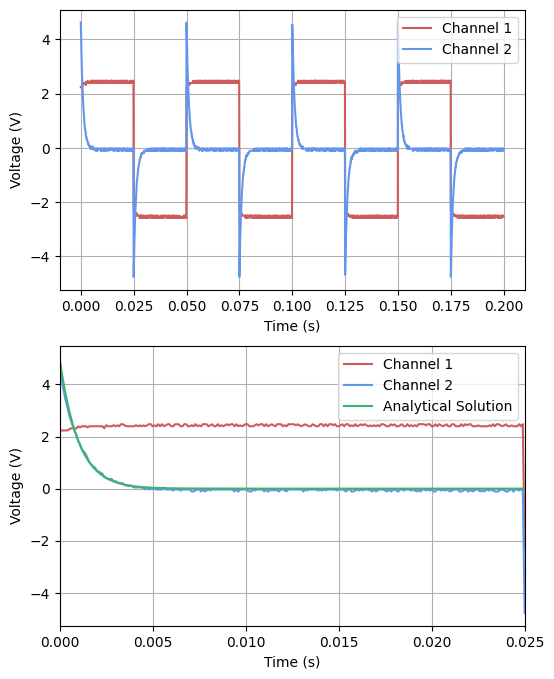

In [73]:
ex5Plot(ex5)

In [74]:
# Calculate and compare decay constants

# Exercise 7

# Exercise 12

In [88]:
ex12SinData = LoadFile(rootPath + r"/ex12/sinWave.txt")
ex12SinWithCapData = LoadFile(rootPath + r"/ex12/sinWaveWithCap.txt")

In [90]:
# Plotting sin input before capacitor

def ex12SinPlot(data):

    xValues = [el - min(data[:,0]) for el in data[:,0]]
    channel01 = data[:,1]
    channel02 = data[:,2]

    difference = [-(a + b) for a, b in zip(channel01, channel02)]

    plt.plot(xValues, difference)

    plt.plot(xValues, channel01)
    plt.plot(xValues, channel02)


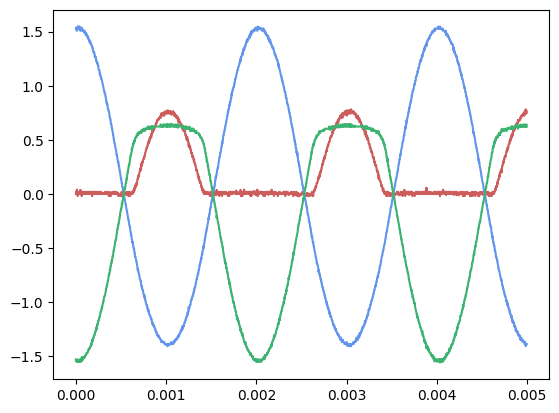

In [91]:
ex12SinPlot(ex12SinData)

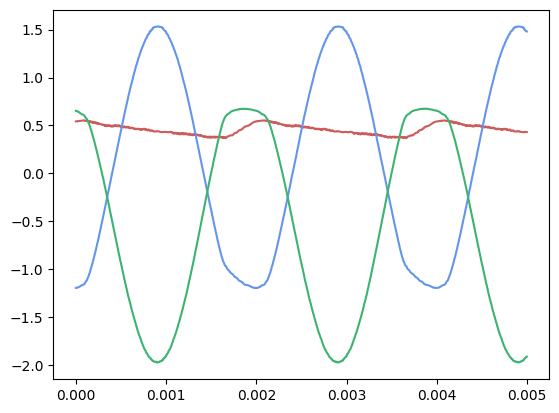

In [92]:
ex12SinPlot(ex12SinWithCapData)